<a href="https://colab.research.google.com/github/RohanCP26/nbaPredictor/blob/main/InjuryRisk_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install LightGBM if not already available
!pip install lightgbm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# =======================
# 1. Load Dataset
# =======================
# Upload CSV manually in Colab, or mount Google Drive and adjust path
#from google.colab import files
#uploaded = files.upload()

df = pd.read_csv("nba_injury_risk_synthetic.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (50, 27)


,player_id,player_name,season,age,height_inches,weight_lbs,position,years_in_nba,games_played,minutes_per_game,usage_rate,team_pace,back_to_backs_played,travel_miles,missed_games_last_season,missed_games_3yr_total,major_injury_flag,surgeries_total,time_since_last_injury_days,drives_per_game,rebounds_per_game,fouls_drawn_per_game,blocks_steals_per_game,team_medical_quality_score,avg_rest_days,team_injury_rate_last_3yrs,missed_games_next_season_pct
0,1,Player_1,2021-22,33,78,238,SF,16,62,29.5,20.2,104.6,7,48710,13,68,0,3,393,9.1,9.3,6.4,1.7,0.70,2.9,0.31,0.18
1,2,Player_2,2022-23,25,81,265,PG,17,34,29.7,14.3,104.1,13,35485,14,46,0,1,66,13.8,9.8,1.1,2.8,0.78,2.3,0.34,0.21
2,3,Player_3,2020-21,30,80,207,SG,2,77,20.1,13.9,97.0,8,31714,0,24,0,1,232,1.1,10.1,5.2,2.0,0.63,1.9,0.14,0.26
3,4,Player_4,2022-23,26,83,245,SG,1,48,18.2,16.3,95.7,9,40652,20,65,1,0,108,14.7,3.1,5.0,0.6,0.60,2.8,0.26,0.26
4,5,Player_5,2022-23,33,78,221,PF,16,33,32.7,23.7,96.0,8,24748,21,9,0,1,145,7.9,3.6,6.0,2.8,0.75,2.3,0.22,0.15


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Dataset shape: (50, 25)
MAE: 0.10807575711243574
R²: -0.2781879873615274


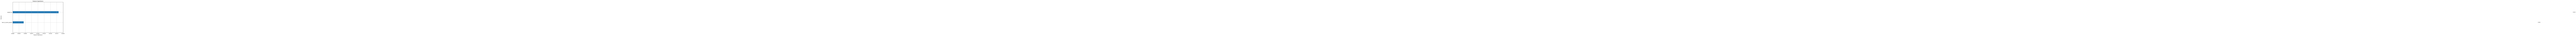

   Actual  Predicted
0    0.22      0.184
1    0.00      0.197
2    0.02      0.190
3    0.11      0.184
4    0.17      0.203
5    0.04      0.197
6    0.03      0.197
7    0.37      0.197
8    0.23      0.184
9    0.17      0.197


In [ ]:
# Install LightGBM if not already available
!pip install lightgbm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# =======================
# 1. Load Dataset
# =======================
# Upload CSV manually in Colab, or mount Google Drive and adjust path
#from google.colab import files
#uploaded = files.upload()

df = pd.read_csv("nba_injury_risk_synthetic2.csv")

print("Dataset shape:", df.shape)
df.head()

# =======================
# 2. Preprocessing
# =======================
target = "missed_games_next_season_pct"

# Drop identifiers / non-features
drop_cols = ["player_id", "player_name", "season"]
X = df.drop(columns=drop_cols + [target])
y = df[target]

# Handle categorical variables (LightGBM handles them directly if passed as category dtype)
categorical_cols = [] # Removed 'position' since it was dropped
for col in categorical_cols:
    X[col] = X[col].astype("category")

# =======================
# 3. Train/Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =======================
# 4. Train LGBM Model
# =======================
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_cols)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=categorical_cols)

params = {
    "objective": "regression",
    "metric": "mae",  # mean absolute error
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "verbose": -1
}

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    num_boost_round=1000,
    #early_stopping_rounds=50,
    #verbose_eval=100
)

# =======================
# 5. Evaluate Model
# =======================
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)

# =======================
# 6. Feature Importance
# =======================
lgb.plot_importance(model, max_num_features=15, importance_type="gain", figsize=(10,6))
plt.show()

# =======================
# 7. Example Predictions
# =======================
predictions = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": np.round(y_pred, 3)
})
print(predictions.head(10))

# New Section